In [4]:
# American elections 
import pandas as pd

In [5]:
election = pd.read_csv(r'countypres_2000-2016.csv')

In [6]:
election.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203


In [17]:
election_2008 = election[election['year'] == 2008]

In [18]:
election_2008.head()

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
21815,2008,Alabama,AL,Autauga,1001.0,President,Barack Obama,democrat,6093.0,23641,20191203
21816,2008,Alabama,AL,Autauga,1001.0,President,John McCain,republican,17403.0,23641,20191203
21817,2008,Alabama,AL,Autauga,1001.0,President,Other,NaN,145.0,23641,20191203
21818,2008,Alabama,AL,Baldwin,1003.0,President,Barack Obama,democrat,19386.0,81413,20191203
21819,2008,Alabama,AL,Baldwin,1003.0,President,John McCain,republican,61271.0,81413,20191203


In [19]:
election_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9474 entries, 21815 to 50277
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            9474 non-null   int64  
 1   state           9474 non-null   object 
 2   state_po        9462 non-null   object 
 3   county          9474 non-null   object 
 4   FIPS            9465 non-null   float64
 5   office          9474 non-null   object 
 6   candidate       9474 non-null   object 
 7   party           6316 non-null   object 
 8   candidatevotes  9462 non-null   float64
 9   totalvotes      9474 non-null   int64  
 10  version         9474 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 888.2+ KB


In [26]:
election_2008_dem = election_2008[election_2008['party'] == 'democrat'][['state_po', 'county', 'candidatevotes']]

In [37]:
election_2008_rep =  election_2008[election_2008['party'] == 'republican'][['state_po', 'county', 'candidatevotes']]

In [38]:
election_2008_dem.columns = ['state', 'county', 'dem_votes']
election_2008_rep.columns = ['state', 'county', 'rep_votes']

In [39]:
election_2008_dem.head()

,state,county,dem_votes
21815,AL,Autauga,6093.0
21818,AL,Baldwin,19386.0
21821,AL,Barbour,5697.0
21824,AL,Bibb,2299.0
21827,AL,Blount,3522.0


In [42]:
election_merge = pd.merge(election_2008_dem, election_2008_rep, how='left', on=['state', 'county'])

In [43]:
election_merge.head()

,state,county,dem_votes,rep_votes
0,AL,Autauga,6093.0,17403.0
1,AL,Baldwin,19386.0,61271.0
2,AL,Barbour,5697.0,5866.0
3,AL,Bibb,2299.0,6262.0
4,AL,Blount,3522.0,20389.0


In [44]:
election_merge['dem_share'] = election_merge['dem_votes'] / (election_merge['dem_votes'] + election_merge['rep_votes'])

In [45]:
election_merge.head()

,state,county,dem_votes,rep_votes,dem_share
0,AL,Autauga,6093.0,17403.0,0.259321
1,AL,Baldwin,19386.0,61271.0,0.240351
2,AL,Barbour,5697.0,5866.0,0.492692
3,AL,Bibb,2299.0,6262.0,0.268543
4,AL,Blount,3522.0,20389.0,0.147296


In [46]:
election_final = election_merge.dropna()

In [47]:
election_final.describe()

,dem_votes,rep_votes,dem_share
count,3.164000e+03,3164.000000,3164.000000
mean,2.209540e+04,19040.452908,0.422553
std,7.659718e+04,44610.751786,0.141863
min,8.000000e+00,67.000000,0.031676
25%,1.836000e+03,2888.500000,0.319564
50%,4.454000e+03,6271.500000,0.418391
75%,1.221225e+04,15794.250000,0.513317
max,2.295853e+06,956425.000000,0.985110


In [48]:
election_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 0 to 3166
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      3164 non-null   object 
 1   county     3164 non-null   object 
 2   dem_votes  3164 non-null   float64
 3   rep_votes  3164 non-null   float64
 4   dem_share  3164 non-null   float64
dtypes: float64(3), object(2)
memory usage: 148.3+ KB


In [50]:
election_final[election_final['county'] == 'Erie']

,state,county,dem_votes,rep_votes,dem_share
1813,NY,Erie,256299.0,178815.0,0.589039
2035,OH,Erie,23148.0,17432.0,0.570429
2239,PA,Erie,75775.0,50351.0,0.600788


In [51]:
import numpy as np

In [53]:
x = np.sort(election_final['dem_share'])

In [55]:
y = np.arange(1, len(x)+1) / len(x)

In [57]:
import matplotlib.pyplot as plt

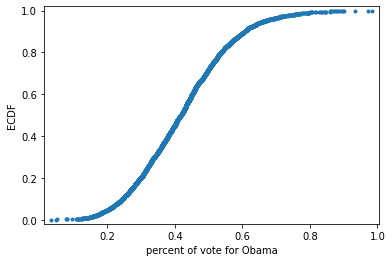

In [62]:
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # keeps data off plot edges
plt.show()

In [63]:
import seaborn as sns

In [82]:
paohfl = pd.concat([election_final[election_final['state'] == 'PA'],  election_final[election_final['state'] == 'OH'],  election_final[election_final['state'] == 'FL']])

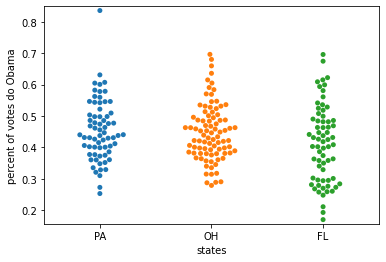

In [84]:
_ = sns.swarmplot(x='state', y='dem_share', data=paohfl)
_ = plt.xlabel('states')
_ = plt.ylabel('percent of votes do Obama')
plt.margins(0.02)
plt.show()

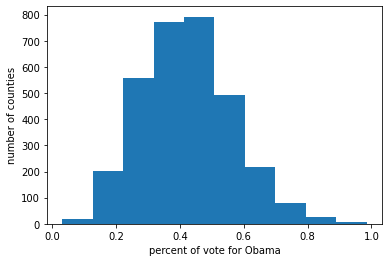

In [87]:
_ = plt.hist(election_final['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

In [100]:
bin_edges = np.array(list(range(0, 101, 10))) / 100
print(bin_edges)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


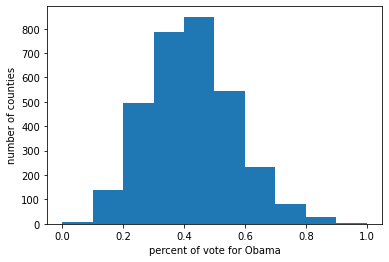

In [101]:
_ = plt.hist(election_final['dem_share'], bins=bin_edges)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

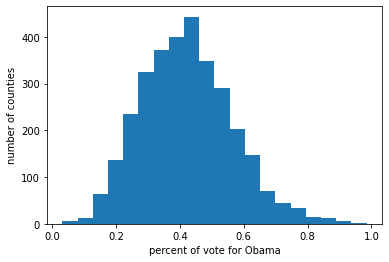

In [102]:
_ = plt.hist(election_final['dem_share'], bins=20)
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

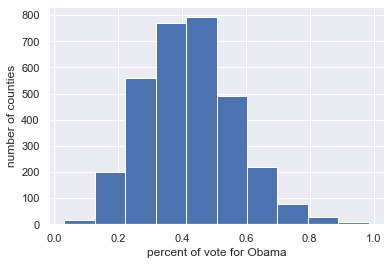

In [104]:
sns.set()
_ = plt.hist(election_final['dem_share'])
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()